In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex7data2.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


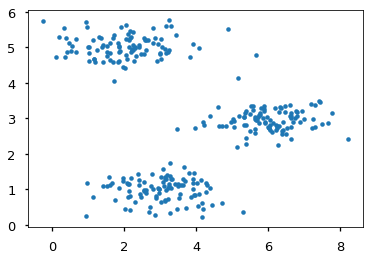

In [3]:
def plotData(X):
    plt.plot(X[:,0], X[:,1], '.');

X = data['X']
plotData(X)

In [4]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    idx = np.zeros([len(X), 1])
    for i in xrange(len(X)):
        dmin, dmin_j = -1, -1
        for j in xrange(len(centroids)):
            dst = np.sum((X[i,:] - centroids[j, :])**2)
#             print dst,
            if dmin > dst or dmin==-1:
                dmin = dst
                dmin_j = j
        idx[i, 0] = dmin_j
#         print '->', dmin_j
    return idx

In [5]:
K = 3
initial_centroids = np.array([[3,3],
                              [6,2],
                              [8,5]])
idx = findClosestCentroids(X, initial_centroids)
print idx[:3]   ### 0,2,1

[[0.]
 [2.]
 [1.]]


In [6]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros([K, n])
    for i in xrange(K):
        centroids[i] = X[np.where(idx==i)[0]].mean(axis=0)
    return centroids

In [7]:
centroids = computeCentroids(X, idx, K)
print centroids
### 2.428301, 3.157924
### 5.813503, 2.633656
### 7.119387, 3.616684

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [8]:
# import matplotlib.lines as lines
def plotProgresskMeans(centroids, previous, ax):
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
    for i in xrange(len(centroids)):
        x1 = [centroids[i,0], previous[i,0]]
        x2 = [centroids[i,1], previous[i,1]]
        plt.plot(x1, x2, 'g');
#         line = lines.Line2D(x1, x2)
#         ax.add_line(line);

def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros([m, 1])
    
    if plot_progress:
        fig, ax = plt.subplots()
        plotData(X)
        plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
        
    for i in xrange(max_iters):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
        if plot_progress:
            plotProgresskMeans(centroids, previous_centroids, ax)
    return centroids, idx

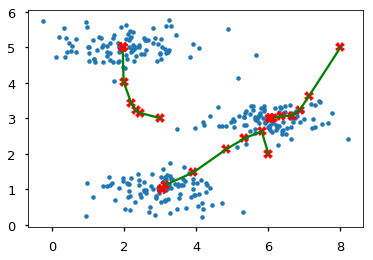

In [9]:
max_iters = 10
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

### Part 4: K-Means Clustering on Pixels

In [10]:
A = plt.imread('bird_small.png')
# plt.imshow(A);

In [11]:
X = A.reshape(A.shape[0]*A.shape[1], 3, order='F')

In [12]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros([K, X.shape[1]])
    randidx = np.random.permutation(len(X))[:K]
    centroids = X[randidx]
    return centroids

In [13]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [14]:
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx.flatten().astype('int'), :]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], 3, order='F')

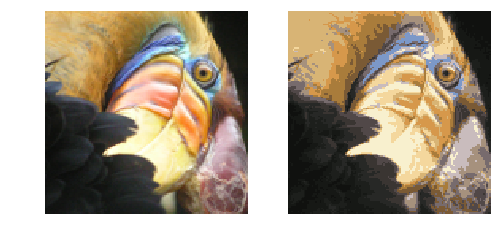

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(A);
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(X_recovered);
plt.axis('off');

### PCA

In [16]:
data = scipy.io.loadmat('ex7data1.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [17]:
X = data['X']

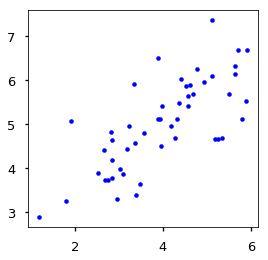

In [18]:
ax = plt.gca();
ax.set_aspect(1);
plt.plot(X[:, 0], X[:, 1], 'b.');

In [19]:
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=1)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

def pca(X):
    m, n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)
    Sigma = 1.0/m * np.dot(X.T, X)
    U, S, V = np.linalg.svd(Sigma)
    return U, S

In [20]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
print 'U ='
print U              ### -0.707107 ... ; -0.707107 ...;
print 'S ='
print S

U =
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S =
[1.70081977 0.25918023]


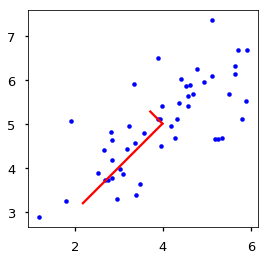

In [21]:
plt.plot(X[:, 0], X[:, 1], 'b.');
ax = plt.gca();
ax.set_aspect(1);
p1 = mu
p2 = mu + 1.5*S[0]*U[:, 0]
p3 = mu + 1.5*S[1]*U[:, 1]
l1 = np.append(p1, p2).reshape(2,2)
l2 = np.append(p1, p3).reshape(2,2)
plt.plot(l1[:, 0], l1[:, 1], 'r');
plt.plot(l2[:, 0], l2[:, 1], 'r');

In [22]:
def projectData(X, U, K):
    U_reduce = U[:, :K]
    Z = np.dot(X, U_reduce)
    return Z

def recoverData(Z, U, K):
    U_reduce = U[:, :K]
    X_rec = np.dot(Z, U_reduce.T)
    return X_rec

In [23]:
K = 1;
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)

print Z[0]  ### 1.481274 
print X_rec[0] ### -1.047419, -1.047419

[1.48127391]
[-1.04741883 -1.04741883]


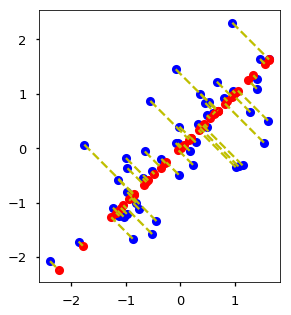

In [24]:
plt.figure(figsize=(5,5));
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');
ax = plt.gca();
ax.set_aspect(1); ### axis square
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro');
for i in xrange(len(X_norm)):
    p1 = X_norm[i]
    p2 = X_rec[i]
    l1 = np.append(p1, p2).reshape(2,2)
    plt.plot(l1[:, 0], l1[:, 1], 'y--');

### Part 4: Loading and Visualizeing Face Data

In [56]:
data = scipy.io.loadmat('ex7faces.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [57]:
def displayData(X, ex_width=0, fig_size=4):
    m, n = X.shape
    if ex_width == 0:
        ex_width = int(math.sqrt(n))
    ex_height = n/ex_width
    rows = int(math.sqrt(m))
    cols = int(m/rows)
    pad = 2
    
    display_arr = -np.ones([pad + rows * (ex_width + pad),
                       pad + cols * (ex_height + pad)])

    idx = 0
    for i in range(rows):
        for j in range(cols):
            max_val = np.max(np.abs(X[idx]))
            display_arr[
                (pad + i*(ex_width+pad)) : ((i+1)*(ex_width+pad)), 
                (pad + j*(ex_height+pad)) : ((j+1)*(ex_height+pad))
            ] = X[idx].reshape(ex_height, ex_width).T/max_val
            idx += 1

    plt.figure(figsize=(fig_size,fig_size));
    plt.imshow(display_arr, cmap='gray');

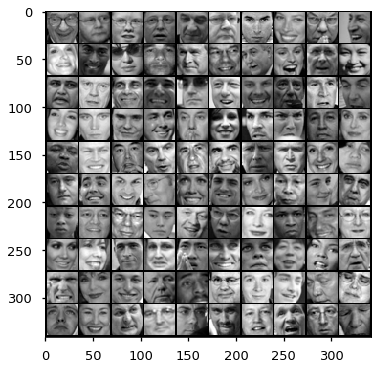

In [58]:
X = data['X']
displayData(X[:100, :], fig_size=6);

### Part 5: PCA on Face Data: Eigenfaces

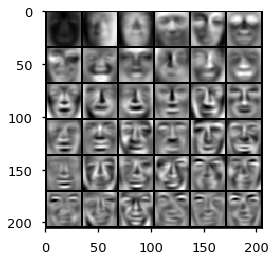

In [59]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
displayData(U[:, :36].T, fig_size=4);

### Part 6: Dimension Reduction for Faces

In [60]:
K = 100
Z = projectData(X_norm, U, K);
print Z.shape
print X.shape

(5000L, 100L)
(5000L, 1024L)


### Part 7: Visualization of Faces after PCA Dimension Reduction

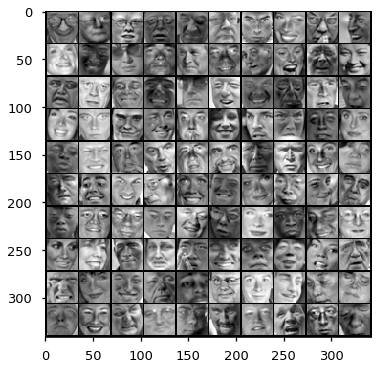

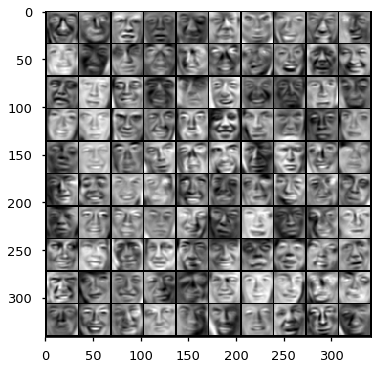

In [61]:
K = 100
X_rec = recoverData(Z, U, K)
displayData(X_norm[:100,:], fig_size=6);
displayData(X_rec[:100,:], fig_size=6);

### Part 8a: PCA for Visualization

In [62]:
A = plt.imread('bird_small.png')
X = A.reshape(A.shape[0]*A.shape[1], 3, order='F')
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [68]:
sel = np.random.permutation(len(X))[:1000]

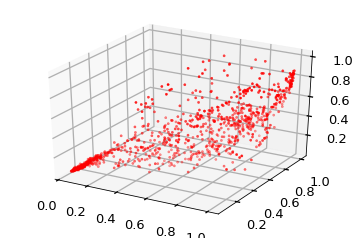

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c='r', marker='.');

### Part 8b: PCA for Visualization

In [71]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

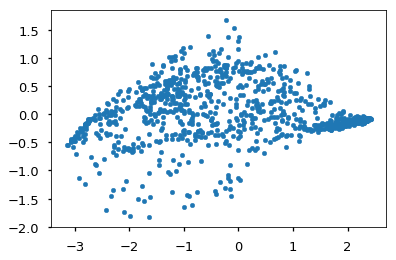

In [77]:
plt.scatter(Z[sel, 0], Z[sel, 1], marker='.');